In [1]:
import pandas as pd

In [2]:
# Some town names have numbers after them, which is weird and makes them
# different rows, so this is to clean the names

import re
def fixname(name):
    #print name
    ret =  re.sub(r'[^A-Za-z ]+',"",str(name).title())
    #print name, "->", ret
    #return ret
    return ret

fixname("Test Name6")

'Test Name'

In [3]:
# Get all the state-level sheets
def get_data():
    
    ret = {}
    
    ret[2006] = pd.read_excel("data/2006/06tbl08ct.xls",skiprows=4)
    ret[2007] = pd.read_excel("data/2007/07tbl08ct.xls",skiprows=4)
    ret[2008] = pd.read_excel("data/2008/08tbl08ct.xls",skiprows=4)
    ret[2009] = pd.read_excel("data/2009/09tbl08ct.xls",skiprows=4)
    ret[2010] = pd.read_excel("data/2010/10tbl08ct.xls",skiprows=4)
    ret[2011] = pd.read_excel("data/2011/Table8StateCuts/Table_8_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2011.xls",
                              skiprows=4)
    ret[2012] = pd.read_excel("data/2012/Table 8 State cuts/Table_8_Offenses_Known_to_Law_Enforcement_by_Connecticut_by_City_2012.xls",
                             skiprows=4)
    ret[2013] = pd.read_excel("data/2013/Table 8 state cuts/Table_8_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2013.xls",
                             skiprows=4)
    ret[2014] = pd.read_excel("data/2014/Table 8 pieces/Table_8_Offenses_Known_to_Law_Enforcement_by_Connecticut_by_City_2014.xls",
                             skiprows=4)
    ret[2015] = pd.read_excel("data/2015/Table 8 pieces/Table_8_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2015.xls",
                             skiprows=4)
    ret[2016] = pd.read_excel("data/2016/Table 6 pieces/Table_6_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2016.xls",
                             skiprows=4)
    
    for y in range(2006,2017):
        ret[y]["City"] = ret[y]["City"].apply(fixname)
    
    
    return ret
data = get_data()
data[2006].head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson1,Unnamed: 12
0,Ansonia,18715.0,22,0.0,3.0,6.0,13.0,383.0,52.0,297.0,34.0,2.0,NaN
1,Avon,17182.0,5,0.0,3.0,0.0,2.0,208.0,30.0,170.0,8.0,0.0,NaN
2,Berlin,19559.0,19,6.0,1.0,10.0,2.0,421.0,88.0,293.0,40.0,3.0,NaN
3,Bethel,18731.0,7,0.0,1.0,3.0,3.0,121.0,22.0,93.0,6.0,1.0,NaN
4,Bridgeport,138791.0,1509,28.0,69.0,659.0,753.0,6987.0,1362.0,4400.0,1225.0,NaN,NaN


In [4]:
# Make a timeline dataframe from a given column
def make_frame(col_names):
    
    df = None
    
    ret = None
    
    for y in range(2006,2017):
        df = None
        try:
            df = data[y]#.set_index("City")
                
            df["City"] = df["City"].apply(lambda x: fixname(x))
            df = df[df["City"].notnull()]
            #return df["City"]
            df = df.set_index("City")
            #return df

            df.columns = df.columns.map(lambda x: str(x).replace("\n"," "))

            for col_name in col_names:
                #print "trying", col_name, col_names
                try:
                    df[y] = df[col_name]
                    #print "got df", y, col_name
                    break
                except:
                    continue
            if ret is None:
                ret = df[[#"Population", 
                        y]]
            else:
                ret = ret.join(df[[y]],how="outer",rsuffix="_" + str(y))
        except Exception as e:
            print "Error in " + str(y), df.columns
            print "ERROR: ", e
    
    # remove all-null rows
    try:
        ret = ret.dropna(axis=0, how='all')#, thresh=None, subset=None, inplace=False)
    except:
        pass
#     ret = ret[
#             ret[2006].notnull() |
#             ret[2007].notnull() |
#             ret[2008].notnull() | 
#             ret[2009].notnull() |
#             ret[2010].notnull() | 
#             ret[2011].notnull() |
#             ret[2012].notnull() | 
#             ret[2013].notnull() |
#             ret[2014].notnull() |
#             ret[2015].notnull() | 
#             ret[2016].notnull() ]
    
    return ret

viol_crime = make_frame(["Violent crime"])
viol_crime.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,22,38.0,26.0,36.0,27.0,30.0,29.0,33.0,36.0,25.0,24.0
Avon,5,3.0,4.0,8.0,5.0,0.0,5.0,12.0,2.0,2.0,1.0
Berlin,19,13.0,21.0,12.0,15.0,15.0,21.0,14.0,11.0,15.0,20.0
Bethel,7,6.0,4.0,1.0,5.0,1.0,6.0,3.0,0.0,4.0,1.0
Bloomfield,NaN,54.0,32.0,47.0,32.0,43.0,31.0,46.0,39.0,57.0,52.0


In [5]:
make_frame(["Arson1","Arson","Arson3"])

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,2.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,1.0
Avon,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Berlin,3.0,0.0,3.0,0.0,3.0,1.0,2.0,1.0,3.0,2.0,0.0
Bethel,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0
Bloomfield,NaN,3.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0,4.0
Branford,NaN,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Bridgeport,NaN,43.0,61.0,42.0,20.0,24.0,25.0,31.0,32.0,8.0,9.0
Bristol,8.0,4.0,0.0,0.0,0.0,9.0,7.0,6.0,5.0,0.0,2.0
Brookfield,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
murders = make_frame(['Murder and nonnegligent manslaughter'])
murders.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Avon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Berlin,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bethel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bloomfield,NaN,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
# Determine the rate (count / 100K people)

def rate(df):
    
    ret = df.copy()
    ret = ret.join(make_frame(["Population"]),lsuffix="_val",rsuffix="_pop")
    cols = []

    
    for y in range(2006,2017):
        cols.append(y)
        #cols.append("rate_" + str(y))
        #try:
        ret[y] = ret[str(y) + "_val" ] * 100000 / ret[str(y) + "_pop"]
        #except:
        #    print 

        
    return ret[cols]

print rate(viol_crime)[range(2007,2017)].to_csv(sep="\t",float_format='%.0f')
#viol_crime_rates = rate(viol_crime)
#viol_crime_rates[viol_crime_rates["Population"] > 100000].sort_values(by="Population",ascending=False).transpose()

City	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016
Ansonia	204	140	195	144	156	150	173	190	132	128
Avon	17	23	46	28	0	28	65	11	11	5
Berlin	64	102	58	72	75	105	68	53	72	97
Bethel	32	22	5	27	5	32	16	0	20	5
Bloomfield	260	154	225	152	210	151	223	188	273	250
Branford	107	155	83	126	93	75	57	89	60	36
Bridgeport	1165	1202	1122	1017	1001	1205	950	905	672	752
Bristol	305	387	298	323	195	153	135	119	129	91
Brookfield	18	36	30	29	61	12	53	18	35	58
Canton	29	29	10	48	19	10	19	19	10	0
Cheshire	31	24	45	41	41	14	7	21	31	14
Clinton	110	125	118	123	143	203	159	137	137	154
Coventry	65	98	163	56	120	16	72	73	8	24
Cromwell	147	125	102	122	43	78	63	56	64	50
Danbury	183	137	163	143	202	133	130	178	186	189
Darien	15	34	69	5	29	10	9	23	14	5
Derby	193	169	210	287	170	217	172	188	243	308
East Hampton	24	63	8	69	85	38	39	23	31	31
East Hartford	453	457	371	378	337	373	355	256	330	290
East Haven	146	174	122	148	82	109	99	113	86	111
East Windsor	244	159	110	115	125	161	140	201	139	140
Easton	27	14	27	0	13	0	1

In [8]:
def total(df):
    ret = df.copy()
    ret["sum"] = ret.sum(axis=1)
    return ret

total_murders = total(make_frame(["Murder and nonnegligent manslaughter"]))
total_murders.sort_values(by="sum",ascending=False).head(10)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,sum
City,,,,,,,,,,,,
Hartford,24.0,31.0,31.0,33.0,26.0,27.0,23.0,23.0,19.0,32.0,14.0,283.0
Bridgeport,28.0,14.0,20.0,12.0,22.0,20.0,22.0,11.0,11.0,19.0,10.0,189.0
New Haven,NaN,NaN,NaN,12.0,23.0,34.0,17.0,19.0,12.0,NaN,13.0,130.0
Waterbury,7.0,3.0,5.0,6.0,5.0,7.0,5.0,5.0,7.0,4.0,10.0,64.0
New Britain,4.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,5.0,9.0,1.0,31.0
Stamford,NaN,3.0,5.0,2.0,2.0,6.0,5.0,1.0,2.0,3.0,2.0,31.0
East Hartford,1.0,3.0,1.0,2.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0,23.0
Norwalk,NaN,3.0,2.0,1.0,6.0,3.0,3.0,0.0,3.0,0.0,1.0,22.0
New London,NaN,NaN,1.0,2.0,2.0,3.0,3.0,3.0,0.0,4.0,1.0,19.0


In [9]:
murders.sort_values(by=2016,ascending=False).head(4)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Hartford,24.0,31.0,31.0,33.0,26.0,27.0,23.0,23.0,19.0,32.0,14.0
New Haven,NaN,NaN,NaN,12.0,23.0,34.0,17.0,19.0,12.0,NaN,13.0
Waterbury,7.0,3.0,5.0,6.0,5.0,7.0,5.0,5.0,7.0,4.0,10.0
Bridgeport,28.0,14.0,20.0,12.0,22.0,20.0,22.0,11.0,11.0,19.0,10.0


In [10]:
# Cities with increases versus decreases

viol_crime_change = (viol_crime[2016] - viol_crime[2006])/viol_crime[2006]
viol_crime_change = viol_crime_change.to_frame()
print "total rows: " + str(len(viol_crime_change))
print "increased:" + str(len(viol_crime_change[viol_crime_change[0] > 0]))
print "decreased:" + str(len(viol_crime_change[viol_crime_change[0] < 0]))
print "no change:" + str(len(viol_crime_change[viol_crime_change[0] == 0]))

total rows: 813
increased:28
decreased:37
no change:4


In [11]:
small

In [12]:
murders[(murders[2006] > 5) | (murders[2010] > 5) | (murders[2016] > 5)][range(2006,2017)]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Berlin,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bridgeport,28.0,14.0,20.0,12.0,22.0,20.0,22.0,11.0,11.0,19.0,10.0
East Hartford,1.0,3.0,1.0,2.0,6.0,0.0,2.0,1.0,2.0,1.0,4.0
Hartford,24.0,31.0,31.0,33.0,26.0,27.0,23.0,23.0,19.0,32.0,14.0
Manchester,0.0,1.0,0.0,0.0,8.0,1.0,1.0,3.0,2.0,0.0,1.0
New Haven,NaN,NaN,NaN,12.0,23.0,34.0,17.0,19.0,12.0,NaN,13.0
Norwalk,NaN,3.0,2.0,1.0,6.0,3.0,3.0,0.0,3.0,0.0,1.0
Waterbury,7.0,3.0,5.0,6.0,5.0,7.0,5.0,5.0,7.0,4.0,10.0


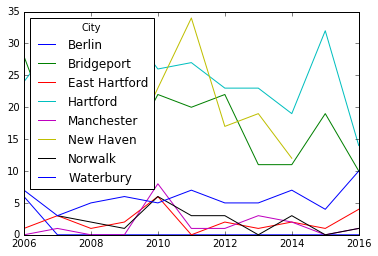

In [13]:
murders[(murders[2006] > 5) | (murders[2010] > 5) | (murders[2016] > 5)][range(2006,2017)]\
.transpose().plot()

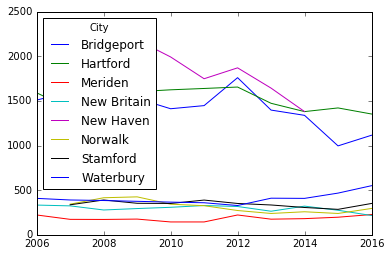

In [14]:
viol_crime[viol_crime[2016] > 200][range(2006,2017)].transpose().plot()#legend=False)

In [15]:
print murders.sort_values(by=2016,ascending=False).head(4).transpose().to_csv(sep="\t")

	Hartford	New Haven	Waterbury	Bridgeport
2006	24.0		7.0	28.0
2007	31.0		3.0	14.0
2008	31.0		5.0	20.0
2009	33.0	12.0	6.0	12.0
2010	26.0	23.0	5.0	22.0
2011	27.0	34.0	7.0	20.0
2012	23.0	17.0	5.0	22.0
2013	23.0	19.0	5.0	11.0
2014	19.0	12.0	7.0	11.0
2015	32.0		4.0	19.0
2016	14.0	13.0	10.0	10.0



In [16]:
rate(make_frame(["Violent crime"]))

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,117.553,204.081633,140.184396,194.636678,144.053780,155.561317,150.485185,172.521957,189.833368,132.366178,127.822752
Avon,29.1002,17.117426,22.828444,45.727351,28.194429,0.000000,27.530008,65.484311,10.845399,10.819583,5.415945
Berlin,97.142,63.788027,102.364124,58.224163,71.554644,75.365523,105.342363,67.773636,52.968652,72.139662,96.641701
Bethel,37.3712,32.137118,21.544759,5.412427,26.575954,5.371146,31.877590,15.513497,0.000000,20.449898,5.073052
Bloomfield,NaN,260.128137,153.602458,225.354814,151.759461,209.510817,150.800214,222.900615,188.242108,272.714224,249.987981
Branford,NaN,106.624475,155.065472,82.761475,125.786164,92.599188,74.852967,57.100032,89.359116,60.125911,35.501278
Bridgeport,1087.25,1164.505467,1201.522809,1122.389727,1017.217780,1001.411804,1205.231802,949.849058,905.142672,671.552730,752.463220
Bristol,282.417,305.096913,386.923304,298.370438,323.211429,194.754823,153.242816,135.219815,118.831490,128.727741,90.991811
Brookfield,NaN,18.184022,36.354823,29.822259,29.422149,60.672249,12.003361,53.304904,17.691809,34.879665,57.877069


In [17]:
make_frame(['Murder and nonnegligent manslaughter'])

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Avon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Berlin,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bethel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bloomfield,NaN,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
Branford,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Bridgeport,28.0,14.0,20.0,12.0,22.0,20.0,22.0,11.0,11.0,19.0,10.0
Bristol,1.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,0.0,0.0
Brookfield,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
rate(viol_crime).sort_values(by=2016,ascending=False)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Hartford,1280.16,1132.805601,1206.163229,1292.231296,1292.726028,1311.137065,1321.853310,1179.088588,1104.503654,1140.879786,1093.457038
New Haven,NaN,NaN,NaN,1765.338552,1595.437945,1344.418893,1439.192205,1253.519085,1054.384866,NaN,934.636764
Bridgeport,1087.25,1164.505467,1201.522809,1122.389727,1017.217780,1001.411804,1205.231802,949.849058,905.142672,671.552730,752.463220
New London,NaN,NaN,768.606852,1024.788275,1078.553381,1152.831484,1324.024165,1077.943615,592.167405,563.854716,712.387421
Waterbury,378.714,363.666881,358.352697,350.444363,337.361391,324.681197,296.870192,373.532065,372.619754,428.267488,506.954494
Meriden,372.733,290.234368,289.830651,296.851018,239.872068,236.139125,364.328618,288.979160,299.907211,327.519992,379.522504
Norwalk,NaN,406.672753,496.988132,510.829587,403.795442,380.126165,313.750822,272.862199,292.410917,269.471880,331.501646
Hamden,166.985,208.685454,185.111499,167.313497,NaN,NaN,527.592083,524.420918,375.006088,307.958026,318.950571
Derby,NaN,192.539110,168.837434,209.812782,287.035561,170.199598,216.768600,171.794471,187.852223,243.423636,308.056872


In [19]:
make_frame(["Population"])

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,18715.0,18620.0,18547.0,18496.0,18743.0,19285.0,19271.0,19128.0,18964.0,18887.0,18776.0
Avon,17182.0,17526.0,17522.0,17495.0,17734.0,18131.0,18162.0,18325.0,18441.0,18485.0,18464.0
Berlin,19559.0,20380.0,20515.0,20610.0,20963.0,19903.0,19935.0,20657.0,20767.0,20793.0,20695.0
Bethel,18731.0,18670.0,18566.0,18476.0,18814.0,18618.0,18822.0,19338.0,19425.0,19560.0,19712.0
Bloomfield,NaN,20759.0,20833.0,20856.0,21086.0,20524.0,20557.0,20637.0,20718.0,20901.0,20801.0
Branford,NaN,29074.0,29020.0,28999.0,29415.0,28078.0,28055.0,28021.0,27977.0,28274.0,28168.0
Bridgeport,138791.0,137655.0,136327.0,136049.0,138810.0,144496.0,146030.0,147076.0,147822.0,148313.0,148180.0
Bristol,61257.0,61292.0,60994.0,60998.0,61879.0,60589.0,60688.0,60642.0,60590.0,60593.0,60445.0
Brookfield,NaN,16498.0,16504.0,16766.0,16994.0,16482.0,16662.0,16884.0,16957.0,17202.0,17278.0


In [20]:
#murder_rates.sort_values(by=2016,ascending=False)

# Part 2: Make a timeline table for each town for each category

In [21]:
# List all column names

def list_cols():
    cols = []
    for y in range(2006,2017):
        for c in data[y].columns:
            #print c
            if c not in cols: 
                cols.append(c)
    return cols
list_cols()

[u'City',
 u'Population',
 u'Violent crime',
 u'Murder and nonnegligent manslaughter',
 u'Forcible rape',
 u'Robbery',
 u'Aggravated assault',
 u'Property crime',
 u'Burglary',
 u'Larceny-theft',
 u'Motor vehicle theft',
 u'Arson1',
 'Unnamed: 12',
 'Unnamed: 13',
 u'Arson',
 u'Violent\ncrime',
 u'Murder and\nnonnegligent\nmanslaughter',
 u'Forcible\nrape',
 u'Aggravated\nassault',
 u'Property\ncrime',
 u'Larceny-\ntheft',
 u'Motor\nvehicle\ntheft',
 u'Rape\n(revised\ndefinition)1',
 u'Rape\n(legacy\ndefinition)2',
 u'Arson3']

In [22]:
col_labels = {
    "violent-crimes":["Violent crime",'Violent\ncrime'],
    "murder": ['Murder and nonnegligent manslaughter',
              'Murder and\nnonnegligent\nmanslaughter'],
    "rape": ['Forcible rape',
             'Forcible\nrape',
             'Rape\n(revised\ndefinition)1',
             'Rape (revised definition)1',
             'Rape\n(legacy\ndefinition)2'],
    "robbery": ['Robbery'],
    "assault": ['Aggravated assault','Aggravated\nassault'],
    'property':['Property crime','Property\ncrime'],
    'burglary':['Burglary'],
    'larceny':['Larceny-\ntheft','Larceny-theft','Larceny- theft'],
    'mv-theft':['Motor vehicle theft','Motor\nvehicle\ntheft'],
    'arson':['Arson1','Arson','Arson3']
    #'UNKNOWN':['Unnamed: 12','Unnamed: 13']
}


def make_timetable(town):

    # Dictionary of equilvant columns

    df = None
    frames = []
    for label in col_labels:
        cur_label = col_labels[label]
        #print "Trying ", cur_label
        df = make_frame(cur_label)
        df = df[df.index == town]
        #print "OK, got dataframe for " + label
        df["Crime"] = label
        frames.append(df.set_index("Crime"))
        
    return pd.concat(frames)
        
make_timetable("Hartford")

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Crime,,,,,,,,,,,
larceny,5957,4437.0,4048.0,4061.0,3639.0,3372.0,3467.0,3416.0,3642.0,3613.0,3616.0
assault,761,680.0,782.0,921.0,982.0,955.0,965.0,840.0,814.0,835.0,798.0
murder,24,31.0,31.0,33.0,26.0,27.0,23.0,23.0,19.0,32.0,14.0
arson,87,107.0,97.0,84.0,95.0,91.0,88.0,45.0,45.0,55.0,112.0
robbery,758,642.0,629.0,600.0,570.0,602.0,640.0,557.0,502.0,510.0,476.0
mv-theft,1709,1601.0,1326.0,993.0,837.0,859.0,802.0,639.0,750.0,897.0,773.0
burglary,1158,1168.0,1000.0,1135.0,1019.0,1271.0,1050.0,981.0,888.0,958.0,808.0
property,8824,7206.0,6374.0,6189.0,5495.0,5502.0,5319.0,5036.0,5280.0,5468.0,5197.0
violent-crimes,1590,1411.0,1503.0,1603.0,1624.0,1639.0,1655.0,1473.0,1380.0,1421.0,1353.0


In [23]:
make_frame(["Larceny-theft",'Larceny-\ntheft','Larceny- theft'])

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,297.0,287.0,268.0,278.0,249.0,271.0,317.0,284.0,280.0,264.0,245.0
Avon,170.0,178.0,125.0,138.0,147.0,149.0,143.0,117.0,142.0,130.0,119.0
Berlin,293.0,299.0,366.0,231.0,260.0,279.0,243.0,225.0,222.0,243.0,257.0
Bethel,93.0,84.0,128.0,171.0,158.0,253.0,263.0,143.0,135.0,141.0,121.0
Bloomfield,NaN,440.0,423.0,367.0,394.0,345.0,404.0,391.0,402.0,417.0,418.0
Branford,NaN,628.0,670.0,558.0,653.0,613.0,595.0,539.0,584.0,622.0,482.0
Bridgeport,4400.0,4223.0,3768.0,3375.0,2377.0,3025.0,2908.0,2610.0,2402.0,2053.0,1857.0
Bristol,1098.0,1046.0,1027.0,777.0,974.0,1017.0,1123.0,963.0,1079.0,878.0,660.0
Brookfield,NaN,128.0,131.0,138.0,102.0,160.0,149.0,141.0,139.0,110.0,95.0


In [24]:
make_frame(['Forcible rape','Forcible\nrape','Rape\n(revised\ndefinition)1','Rape (revised definition)1'])

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,3.0,3.0,3.0,4.0,2.0,3.0,4.0,5.0,6.0,5.0,2.0
Avon,3.0,0.0,1.0,3.0,1.0,0.0,2.0,8.0,1.0,1.0,0.0
Berlin,1.0,1.0,2.0,1.0,2.0,1.0,0.0,5.0,3.0,2.0,3.0
Bethel,1.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,4.0,0.0
Bloomfield,NaN,9.0,4.0,12.0,3.0,6.0,5.0,9.0,6.0,8.0,9.0
Branford,NaN,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Bridgeport,69.0,77.0,58.0,58.0,57.0,116.0,388.0,NaN,92.0,80.0,69.0
Bristol,13.0,12.0,27.0,26.0,27.0,10.0,9.0,15.0,11.0,11.0,10.0
Brookfield,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def all_cities():
    ret = []
    for y in range(2006,2017):
        df = get_data()[y].set_index("City").dropna(axis=0,how='any')
        cities = df.index
        for c in cities:
            if c in ret: 
                continue
            ret.append(c)
    return ret

all_cities()[:10]
    

['Groton Town',
 'Ansonia',
 'Avon',
 'Berlin',
 'Bethel',
 'Bloomfield',
 'Branford',
 'Bridgeport',
 'Bristol',
 'Brookfield']

In [26]:
def make_all_timetables():
    for c in all_cities():
        make_timetable(c).to_csv("output/" + c + ".csv")

In [27]:
make_all_timetables()

In [28]:
def make_mega_timetable_dataframe():
    
    ret = []
    
    for c in all_cities():
        df = make_timetable(c)
        df["City"] = c
        ret.append(df)
    return pd.concat(ret)

mega_timeline = make_mega_timetable_dataframe()



In [29]:
mega_timeline.to_csv("output/mega.csv")

In [30]:
mega_timeline.reset_index().set_index("City","Crime").to_csv("output/crime_timelines.csv")

# Caveats

According to: https://www.ucrdatatool.gov/Search/Crime/Local/RunCrimeTrendsInOneVar.cfm

Avon Police Dept Connecticut 2010 - Because of changes in the agency's reporting practices, 2010 figures are not comparable to previous years' data.
  	
Bristol Police Dept Connecticut 1993 - Due to reporting changes, 1993 aggravated assault figure is not comparable to previous years.
  	
Fairfield Police Dept Connecticut 1993 - Due to reporting changes, 1993 aggravated assault figure is not comparable to previous years.
  	
Manchester Police Dept Connecticut 2004 - Because of changes in reporting practices, annexations, and/or incomplete data, 2004 figures are not comparable to previous years' data.
  	
Stamford Police Dept Connecticut 2005 - Because of changes in the agency's reporting practices, 2005 figures are not comparable to previous years' data.
  	
West Haven Police Dept Connecticut 2002 - Due to changes in reporting practices, annexations, and/or incomplete data, 2002 figures are not comparable to previous years' data.


# Adding in historical data

I pulled down a number of agency-level time tables from the FBI site that go back further than 2006 for a few key crime categories. I'm going to add them to the

In [268]:
import os

def get_csvs(folder = "data/manual_pull/",skiprows=0):
    ret = {}
    
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        topic = fname.replace(".csv","")
        df = pd.read_csv(fpath,skiprows=skiprows)
        df["City"] = df["Agency"].str.replace(" Town Police Dept","")
        df["City"] = df["City"].str.replace(" Police Dept", "")
        df["City"] = df["City"].str.replace(" Police", "")
        
        # combine complementary columns based on def'n change
#         if topic == "rape": 
#             df = df.groupby(df.index).max()
#             #print df
            
        ret[topic] = df.set_index("City").dropna(thresh=5)

    return ret

hist_dfs = get_csvs(skiprows=4)

df = hist_dfs["rape"]
hist_dfs["rape"] = df.groupby(df.index).max()


df = hist_dfs["violent-crimes"]
hist_dfs["violent-crimes"] = df.groupby(df.index).max()

print hist_dfs.keys()

['murder', 'mv-theft', 'violent-crimes', 'larceny', 'assault', 'robbery', 'burglary', 'property', 'rape']


In [269]:
hist_dfs["violent-crimes"].sort_index()

,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Unnamed: 32
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,Ansonia Police Dept,CT,119.0,54.0,52.0,78.0,70.0,74.0,55.0,42.0,...,28.0,38.0,26.0,36.0,28.0,30.0,29.0,33.0,38.0,NaN
Avon,Avon Police Dept,CT,6.0,8.0,11.0,8.0,10.0,7.0,8.0,5.0,...,5.0,3.0,4.0,8.0,6.0,0.0,5.0,12.0,2.0,NaN
Berlin,Berlin Police Dept,CT,2.0,3.0,7.0,6.0,4.0,9.0,8.0,11.0,...,19.0,15.0,21.0,13.0,17.0,15.0,21.0,15.0,11.0,NaN
Bethel,Bethel Police Dept,CT,8.0,12.0,13.0,8.0,6.0,10.0,15.0,11.0,...,8.0,7.0,4.0,1.0,5.0,1.0,6.0,3.0,0.0,NaN
Bloomfield,Bloomfield Police Dept,CT,48.0,58.0,55.0,93.0,66.0,78.0,66.0,40.0,...,57.0,57.0,33.0,50.0,42.0,43.0,31.0,47.0,40.0,NaN
Branford,Branford Police Dept,CT,15.0,13.0,18.0,12.0,19.0,17.0,24.0,28.0,...,42.0,31.0,45.0,24.0,37.0,26.0,21.0,17.0,25.0,NaN
Bridgeport,Bridgeport Police Dept,CT,2194.0,1987.0,1810.0,2100.0,2682.0,2888.0,2860.0,2890.0,...,1509.0,1603.0,1638.0,1527.0,1412.0,1447.0,1760.0,1397.0,1338.0,NaN
Bristol,Bristol Police Dept,CT,136.0,194.0,146.0,198.0,204.0,175.0,298.0,281.0,...,173.0,187.0,236.0,192.0,200.0,118.0,93.0,82.0,73.0,NaN
Brookfield,Brookfield Police Dept,CT,14.0,16.0,13.0,19.0,19.0,7.0,11.0,4.0,...,10.0,3.0,6.0,5.0,5.0,10.0,2.0,9.0,3.0,NaN


In [270]:
def add_history(df, hist_df):
    
    new = df.copy()
    new = new.rename(columns = lambda x: str(x))
#     ret = hist_df.join(new,how="left",lsuffix="_hist",rsuffix="_new")
    ret = hist_df.reset_index().merge(new.reset_index(),on="City",how="outer",suffixes=["_hist","_new"],left_index=True,right_index=True)
    ret = ret.set_index("City")
    return ret.dropna(axis=0,how="all")
    
add_history(make_frame(col_labels["murder"]),hist_dfs["murder"]).columns

Index([u'Agency', u'State', u'1985', u'1986', u'1987', u'1988', u'1989',
       u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997',
       u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005',
       u'2006_hist', u'2007_hist', u'2008_hist', u'2009_hist', u'2010_hist',
       u'2011_hist', u'2012_hist', u'2013_hist', u'2014_hist', u'Unnamed: 32',
       u'2006_new', u'2007_new', u'2008_new', u'2009_new', u'2010_new',
       u'2011_new', u'2012_new', u'2013_new', u'2014_new', u'2015', u'2016'],
      dtype='object')

In [271]:
# Check columns that overlap to see if the historical data has the same valus as the newer sheets
err_count = 0
tot_count = 0
def add_checks(df):
    
    global err_count, tot_count
    
    err_count = 0
    tot_count = 0
    
    ret = df.copy()
    overlap = map(lambda x: x.replace("_new",""),
                  filter(lambda x: "_new" in x, ret.columns.get_values()))

    for y in overlap:
        #print ret.dtypes
        ret[y + "_new"] = pd.to_numeric(ret[y + "_new"],errors=coerce)
        ret[y + "_hist"] = pd.to_numeric(ret[y + "_hist"],errors=coerce)
        ret[y + "_diff"] = ret[y + "_new"].sub(ret[y + "_hist"])
        ret[y + "_diff_pct"] = ret[y + "_diff"] / ret[y + "_hist"]
        def y_or_null(row,y):
            global tot_count,err_count
            tot_count += 1
            if row[y + "_new"] == row[y + "_hist"]:
                return row[y + "_new"]
            #print row[y + "_new"] - row[y + "_hist"]
            err_count += 1
            return None
        ret[y] = ret.apply(lambda x: y_or_null(x,y) ,axis=1)
        
    print "Errors: " + str(err_count)
    print "Total:  " + str(tot_count)
    return ret
    
add_checks(add_history(make_frame(["Murder and nonnegligent manslaughter"]),
                       hist_dfs["murder"]))#.head(1).transpose()

Errors: 359
Total:  828


,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012_diff,2012_diff_pct,2012,2013_diff,2013_diff_pct,2013,2014_diff,2014_diff_pct,2014
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,Ansonia Police Dept,CT,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Avon,Avon Police Dept,CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Berlin,Berlin Police Dept,CT,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Bethel,Bethel Police Dept,CT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Bloomfield,Bloomfield Police Dept,CT,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,NaN,0.0,0.0,0.000000,1.0,0.0,NaN,0.0
Branford,Branford Police Dept,CT,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,0.0,-1.0,-1.000000,NaN,0.0,0.000000,1.0
Bridgeport,Bridgeport Police Dept,CT,30.0,40.0,37.0,43.0,36.0,57.0,51.0,57.0,...,20.0,0.0,0.000000,22.0,0.0,0.000000,11.0,0.0,0.000000,11.0
Bristol,Bristol Police Dept,CT,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.000000,3.0,0.0,0.000000,2.0,0.0,0.000000,3.0
Brookfield,Brookfield Police Dept,CT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0


In [272]:
pd.to_numeric(make_frame(["Violent crime"])[2006],errors=coerce)

City
Ansonia                22.0
Avon                    5.0
Berlin                 19.0
Bethel                  7.0
Bloomfield              NaN
Branford                NaN
Bridgeport           1509.0
Bristol               173.0
Brookfield              NaN
Canton                  4.0
Cheshire                8.0
Clinton                 NaN
Coventry                NaN
Cromwell                NaN
Danbury               132.0
Darien                 47.0
Derby                   NaN
East Hampton            1.0
East Hartford         235.0
East Haven             25.0
East Windsor           12.0
Easton                  4.0
Enfield                94.0
Fairfield              36.0
Farmington             14.0
Glastonbury            16.0
Granby                  3.0
Greenwich              25.0
Groton                 26.0
Groton Long Point       1.0
                      ...  
Rocky Hill              NaN
Seymour                31.0
Shelton                20.0
Simsbury                5.0
South Windsor  

In [273]:
add_checks(add_history(make_frame(["Violent crime"]),
                       hist_dfs["violent-crimes"])).to_csv("output/violent-crimes-with-hist.csv")

Errors: 7179
Total:  7317


In [274]:
def make_hist_table(topic):
    
    try:

        return add_checks(add_history(make_frame(col_labels[topic]),
                                      hist_dfs[topic]))
    except:
        # fall back if can't get history data. arson doesn't have it
        return make_frame(col_labels[topic])
    

#make_hist_table("rape")

add_history(make_frame(col_labels["rape"]),
                       hist_dfs["rape"])#.index.unique()


,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2007_new,2008_new,2009_new,2010_new,2011_new,2012_new,2013_new,2014_new,2015,2016
City,,,,,,,,,,,,,,,,,,,,,
Agency,Agency,State,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,...,3.0,3.0,4.0,2.0,3.0,4.0,5.0,6.0,5.0,2.0
Ansonia,Ansonia Police Dept,CT,33.0,5.0,1.0,5.0,4.0,1.0,10.0,3.0,...,0.0,1.0,3.0,1.0,0.0,2.0,8.0,1.0,1.0,0.0
Avon,Avon Police Dept,CT,0.0,0.0,2.0,0.0,3.0,2.0,1.0,0.0,...,1.0,2.0,1.0,2.0,1.0,0.0,5.0,3.0,2.0,3.0
Berlin,Berlin Police Dept,CT,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,4.0,0.0
Bethel,Bethel Police Dept,CT,3.0,4.0,4.0,3.0,3.0,4.0,11.0,1.0,...,9.0,4.0,12.0,3.0,6.0,5.0,9.0,6.0,8.0,9.0
Bloomfield,Bloomfield Police Dept,CT,3.0,5.0,5.0,6.0,2.0,6.0,3.0,4.0,...,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Branford,Branford Police Dept,CT,0.0,2.0,3.0,0.0,4.0,1.0,4.0,4.0,...,77.0,58.0,58.0,57.0,116.0,388.0,NaN,92.0,80.0,69.0
Bridgeport,Bridgeport Police Dept,CT,57.0,75.0,58.0,90.0,70.0,79.0,82.0,74.0,...,12.0,27.0,26.0,27.0,10.0,9.0,15.0,11.0,11.0,10.0
Bristol,Bristol Police Dept,CT,4.0,2.0,6.0,3.0,5.0,12.0,6.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [275]:
make_hist_table("rape")[make_hist_table("rape").index == "Ansonia"]

Errors: 754
Total:  828
Errors: 754
Total:  828


,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012_diff,2012_diff_pct,2012,2013_diff,2013_diff_pct,2013,2014_diff,2014_diff_pct,2014
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,Ansonia Police Dept,CT,33.0,5.0,1.0,5.0,4.0,1.0,10.0,3.0,...,NaN,-2.0,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,None


In [276]:
mega_hist[mega_hist["crime"] == "violent-crimes"][map(lambda x: str(x), range(1985,2017))]

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,,,,,,,,,,,
\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,25.0,24.0
MSA and non-MSA county populations are not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,2.0,1.0
Variations in population coverage and reporting practices may cause differences in reporting from year to year. (See definitions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,15.0,20.0
Crime rates are not available for agencies that report data for less than 12 months of a year.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,4.0,1.0
"Avon Connecticut 2010 - Because of changes in the agency's reporting practices, 2010 figures are not comparable to previous years' data.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,57.0,52.0
"Bristol Connecticut 1993 - Due to reporting changes, 1993 aggravated assault figure is not comparable to previous years.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,17.0,10.0
"Fairfield Connecticut 1993 - Due to reporting changes, 1993 aggravated assault figure is not comparable to previous years.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,996.0,1115.0
"Manchester Connecticut 2004 - Because of changes in reporting practices, annexations, and/or incomplete data, 2004 figures are not comparable to previous years' data.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,78.0,55.0
"Stamford Connecticut 2005 - Because of changes in the agency's reporting practices, 2005 figures are not comparable to previous years' data.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,None,None,None,6.0,10.0


In [277]:
def make_all_tables_with_hist():
    ret = {}
    for label in col_labels:
        print label
        try:
            ret[label] = make_hist_table(label)
            ret[label].to_csv("output/historical-" + label + ".csv" )
        except Exception as e:
            print e
            continue
            
    return ret
        
all_hist_tables = make_all_tables_with_hist()

larceny
Errors: 727
Total:  828
assault
Errors: 655
Total:  828
murder
Errors: 359
Total:  828
arson
robbery
Errors: 638
Total:  828
mv-theft
Errors: 662
Total:  828
burglary
Errors: 688
Total:  828
property
Errors: 726
Total:  828
violent-crimes
Errors: 7179
Total:  7317
rape
Errors: 754
Total:  828


In [278]:
all_hist_tables["rape"][all_hist_tables["rape"].index == "Waterbury"]

,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012_diff,2012_diff_pct,2012,2013_diff,2013_diff_pct,2013,2014_diff,2014_diff_pct,2014
City,,,,,,,,,,,,,,,,,,,,,
Waterbury,Waterbury Police Dept,CT,35.0,22.0,37.0,28.0,31.0,32.0,32.0,61.0,...,9.0,8.0,1.142857,NaN,6.0,3.0,NaN,NaN,NaN,None


In [279]:
make_all_tables_with_hist().keys()

larceny
Errors: 727
Total:  828
assault
Errors: 655
Total:  828
murder
Errors: 359
Total:  828
arson
robbery
Errors: 638
Total:  828
mv-theft
Errors: 662
Total:  828
burglary
Errors: 688
Total:  828
property
Errors: 726
Total:  828
violent-crimes
Errors: 7179
Total:  7317
rape
Errors: 754
Total:  828


['murder',
 'arson',
 'mv-theft',
 'violent-crimes',
 'larceny',
 'assault',
 'robbery',
 'burglary',
 'property',
 'rape']

In [280]:
def make_mega_historical():
    tmp_mega_hist = make_all_tables_with_hist()
    df = None
    frames = []
    for topic in tmp_mega_hist:
        df = tmp_mega_hist[topic].copy()
        df["crime"] = topic
        frames.append(df)
        
    return pd.concat(frames).dropna(thresh=5)

mega_hist = make_mega_historical()
mega_hist.to_csv("output/historical-all.csv")
mega_hist.to_csv("viz/data/historical-all.csv")

print mega_hist["crime"].unique()

larceny
Errors: 727
Total:  828
assault
Errors: 655
Total:  828
murder
Errors: 359
Total:  828
arson
robbery
Errors: 638
Total:  828
mv-theft
Errors: 662
Total:  828
burglary
Errors: 688
Total:  828
property
Errors: 726
Total:  828
violent-crimes
Errors: 7179
Total:  7317
rape
Errors: 754
Total:  828
['murder' 'arson' 'mv-theft' 'violent-crimes' 'larceny' 'assault' 'robbery'
 'burglary' 'property' 'rape']


In [281]:
mega_hist[mega_hist.index == "Ansonia"]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2014_diff,2014_diff_pct,2014_hist,2014_new,2015,2016,Agency,State,Unnamed: 32,crime
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,Ansonia Police Dept,CT,NaN,murder
Ansonia,2.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,arson
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,30.0,30.0,39.0,41.0,Ansonia Police Dept,CT,NaN,mv-theft
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-0.052632,38.0,36.0,25.0,24.0,Ansonia Police Dept,CT,NaN,violent-crimes
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-0.003559,281.0,280.0,264.0,245.0,Ansonia Police Dept,CT,NaN,larceny
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-0.142857,14.0,12.0,8.0,12.0,Ansonia Police Dept,CT,NaN,assault
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,18.0,18.0,12.0,10.0,Ansonia Police Dept,CT,NaN,robbery
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,62.0,62.0,47.0,45.0,Ansonia Police Dept,CT,NaN,burglary
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-0.002681,373.0,372.0,350.0,331.0,Ansonia Police Dept,CT,NaN,property


In [282]:
make_mega_historical().to_json("output/historical-all.json",orient="records")

larceny
Errors: 727
Total:  828
assault
Errors: 655
Total:  828
murder
Errors: 359
Total:  828
arson
robbery
Errors: 638
Total:  828
mv-theft
Errors: 662
Total:  828
burglary
Errors: 688
Total:  828
property
Errors: 726
Total:  828
violent-crimes
Errors: 7179
Total:  7317
rape
Errors: 754
Total:  828


In [283]:
mega_hist

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2014_diff,2014_diff_pct,2014_hist,2014_new,2015,2016,Agency,State,Unnamed: 32,crime
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,Ansonia Police Dept,CT,NaN,murder
Avon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,Avon Police Dept,CT,NaN,murder
Berlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,Berlin Police Dept,CT,NaN,murder
Bethel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,1.0,Bethel Police Dept,CT,NaN,murder
Bloomfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,1.0,0.0,Bloomfield Police Dept,CT,NaN,murder
Branford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,1.0,1.0,0.0,0.0,Branford Police Dept,CT,NaN,murder
Bridgeport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,11.0,11.0,19.0,10.0,Bridgeport Police Dept,CT,NaN,murder
Bristol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,3.0,3.0,0.0,0.0,Bristol Police Dept,CT,NaN,murder
Brookfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,Brookfield Police Dept,CT,NaN,murder


# Make small charts for each town, for each topic

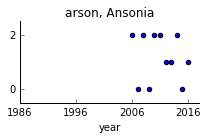

In [284]:


import numpy as np

csfont = {'fontname':'Monaco'}
hfont = {'fontname':'Helvetica'}


def small(city, crime):
    
    ret = mega_hist[(mega_hist.index == city) &
              (mega_hist["crime"] == crime)]

    cols = filter(
        lambda x: x in ret.columns,
        map(lambda x: str(x), range(1985,2017)))

    #print cols
    
    ret.columns = ret.columns.map(lambda x: str(x))
    ret = ret[cols]
    
    
    #return ret
#     for col in cols:
#         ret[col] = pd.to_numeric(ret[col],errors=coerce)
    #print ret
    ret = ret.transpose()

    ret = ret.reset_index()
    ret.columns = ["year","count"]
    ret["year"] = pd.to_numeric(ret["year"],errors=coerce)
    
    fig = plt.figure()   

    fig.set_figheight(1)
    fig.set_figwidth(4)
    #ax = fig.add_subplot(111)
    ax = ret.plot.scatter(x="year", y="count", figsize=(3,2))

    ax.set_xticks([1986,1996,2006,2016])
    
    ax.set_yticks([0,ret["count"].max()])
    ax.set_ylabel("")
    ax.set_ylabel("")
    ax.set_title(crime.replace("-"," ") + ", " + city,**csfont)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.tight_layout()
              


    plt.savefig("output/figures/" + city + "-" + crime + ".png")
    plt.savefig("viz/img/" + city + "-" + crime + ".png")


    
#ax = small("Bethel","larceny").plot.scatter(x="year", y="count", figsize=(3,1))

#plt.show()

small("Ansonia","arson")

In [285]:
mega_hist["crime"].unique()

array(['murder', 'arson', 'mv-theft', 'violent-crimes', 'larceny',
       'assault', 'robbery', 'burglary', 'property', 'rape'], dtype=object)

In [286]:
small("Naugatuck","violent-crimes")

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [ ]:
small("Bridgeport","arson")

In [ ]:
make_hist_table("arson")

In [258]:
tmp_df = mega_hist[(mega_hist.index == "Naugatuck") &
              (mega_hist["crime"] == "violent-crimes")]
tmp_df#.groupby(tmp_df.index).max()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2014_diff,2014_diff_pct,2014_hist,2014_new,2015,2016,Agency,State,Unnamed: 32,crime
City,,,,,,,,,,,,,,,,,,,,,
Naugatuck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.0,NaN,NaN,NaN,Naugatuck Police Dept,CT,NaN,violent-crimes
Naugatuck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.0,34.0,37.0,NaN,NaN,NaN,violent-crimes


In [260]:
tmp = make_hist_table("violent-crimes")
tmp

Errors: 7316
Total:  7317


,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012_diff,2012_diff_pct,2012,2013_diff,2013_diff_pct,2013,2014_diff,2014_diff_pct,2014
City,,,,,,,,,,,,,,,,,,,,,
\t\t,\t\t,2. The figures shown in this column for the of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
MSA and non-MSA county populations are not available.,MSA and non-MSA county populatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
Variations in population coverage and reporting practices may cause differences in reporting from year to year. (See definitions),Variations in population coverag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
Crime rates are not available for agencies that report data for less than 12 months of a year.,Crime rates are not available for ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
"Avon Connecticut 2010 - Because of changes in the agency's reporting practices, 2010 figures are not comparable to previous years' data.",Avon Police Dept Connecticut 2010 - B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
"Bristol Connecticut 1993 - Due to reporting changes, 1993 aggravated assault figure is not comparable to previous years.",Bristol Police Dept Connecticut 1993 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
"Fairfield Connecticut 1993 - Due to reporting changes, 1993 aggravated assault figure is not comparable to previous years.",Fairfield Police Dept Connecticut 199...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
"Manchester Connecticut 2004 - Because of changes in reporting practices, annexations, and/or incomplete data, 2004 figures are not comparable to previous years' data.",Manchester Police Dept Connecticut 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None
"Stamford Connecticut 2005 - Because of changes in the agency's reporting practices, 2005 figures are not comparable to previous years' data.",Stamford Police Dept Connecticut 2005...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None


In [ ]:
def make_all_plots(crimes = col_labels):
    for city in mega_hist.reset_index()["City"].unique():
        for crime in crimes:
            try:
                small(city, crime)
            except:
                print city, crime
                continue
#make_all_plots(crimes=["violent-crimes"])
make_all_plots()

In [ ]:
small("Naugatuck violent-crimes","violent-crimes")